# 0. Loading the dataset

In [1]:
# Import pandas, matplotlib and seaborn libraries
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
# Import Image, warnings
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the parameters and the style for plotting
params = {'figure.figsize':(12,8),
         'axes.labelsize':13,
         'axes.titlesize':16,
         'xtick.labelsize':11,
         'ytick.labelsize':11
         }
plt.rcParams.update(params)
sns.set_style("whitegrid")

In this notebook, we will be using dataset Titanic containing information about passengers to inspect continuous, discrete, binary and categorical variables.

In [3]:
# Load the dataset 'Data/titanic_data.csv' and store it to variable data
data = pd.read_csv('Data/titanic_data.csv')
# Get first 5 rows of the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get the dimensions of the data
data.shape

(891, 12)

We have 891 observations and 12 variables in our dataset, let's look at the definition of variables:

**Data dictionary:**
- passengerID
- Survived: 0 = No, 1 = Yes
- Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name
- Sex
- Age
- SibSp: # of siblings or spouses aboard the Titanic
- Parch: # of parents or children aboard the Titanic
- Ticket: ticket number
- Fare: passenger fare
- Cabin: cabin number
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# 1. Continuous variables

Firstly, let's look at the distribution of the passenger fares.

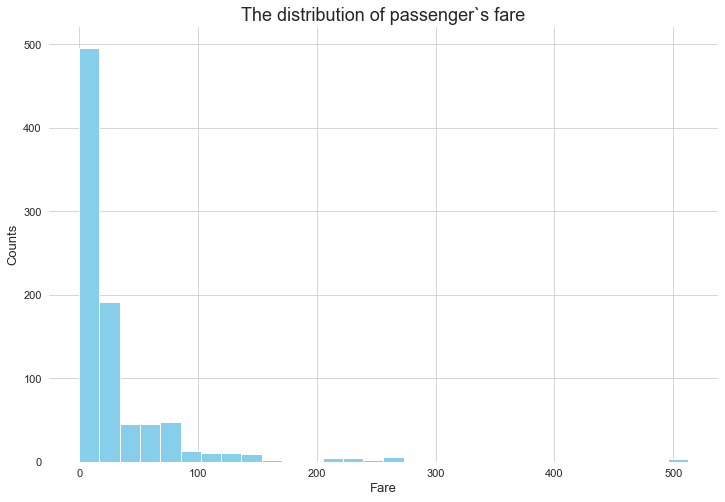

In [5]:
# Plot the distribution of the residual sugar
plt.hist(data['Fare'], bins = 30, color = 'skyblue')
plt.xlabel('Fare')
plt.ylabel('Counts')
plt.title('The distribution of passenger`s fare', fontsize = 18)
sns.despine(left=True, bottom=True);

As we can see from the graph above, the passenger's fares vary across the range from value 0 up to approximately value 500.

# 2. Discrete variables

Now we'll explore the variable SibSp which represents number of parents or children aboard the Titanic. This variable is specified as discrete variable, because the passengers can have 1 or 2 childrens, not 1.5 child.

Let's look how many unique values has 'SibSp' variable.

In [6]:
# Get the counts of unique values of column 'SibSp'
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

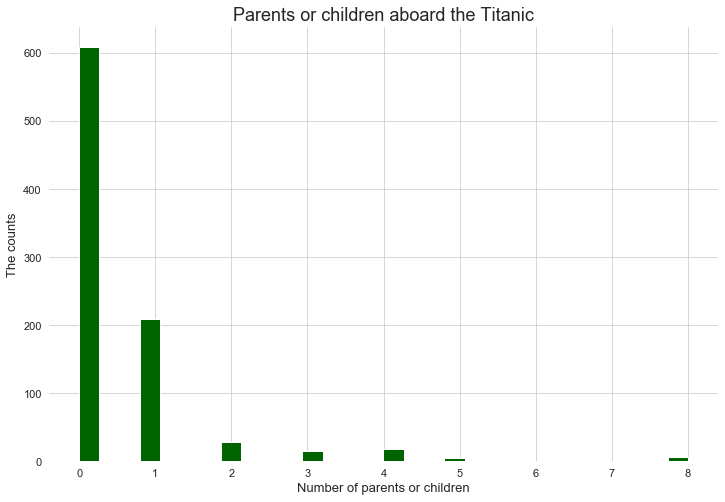

In [7]:
# Plot the counts of unique values of column 'SibSp'
plt.hist(data['SibSp'], bins = 30, color = 'darkgreen')
plt.xlabel('Number of parents or children')
plt.ylabel('The counts')
plt.title('Parents or children aboard the Titanic', fontsize = 18)
sns.despine(left=True, bottom=True);

The values differ by fixed number (amount), and therefore there are space between values when we are plotting them.

# 3. Binary variables

Binary variable is a variable that can take only 2 values, in our case 0 (not survived) and 1 (survived).

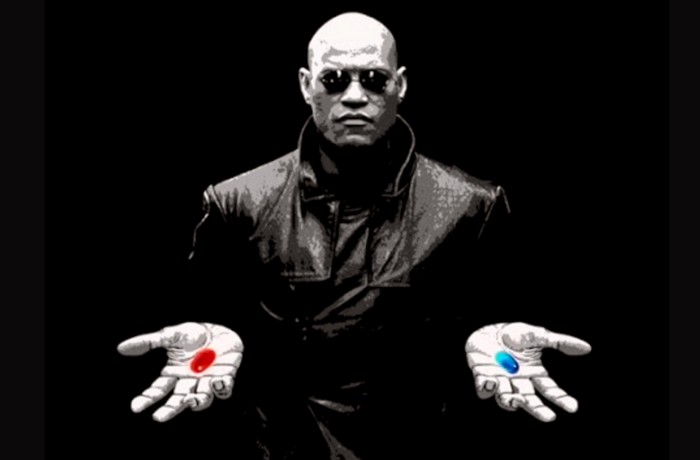

In [8]:
# Run this 
Image('Image/binary.jpeg')

Now, we'll look how the histogram of 'Survived' column looks like.

In [9]:
# Get the unique values of 'Survived' column
data['Survived'].unique()

array([0, 1], dtype=int64)

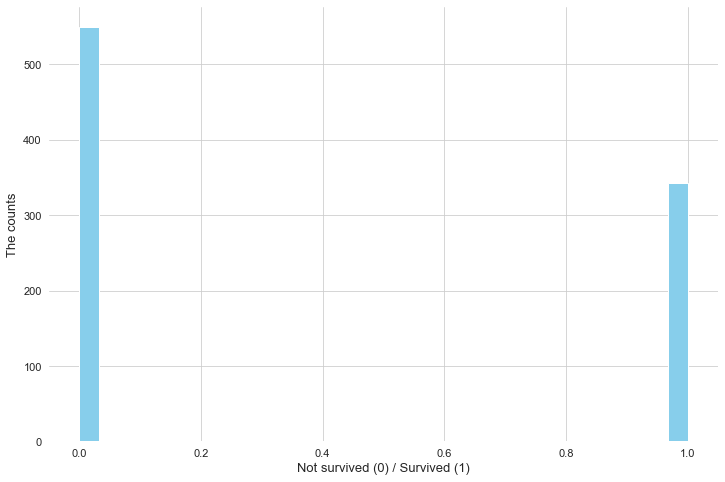

In [10]:
# Plot the variable 'Survived'
plt.hist(data['Survived'], bins = 30, color = 'skyblue')
plt.xlabel('Not survived (0) / Survived (1)')
plt.ylabel('The counts')
sns.despine(left=True, bottom=True);

In this case it would be better to show the counts along with for example the gender of passengers.

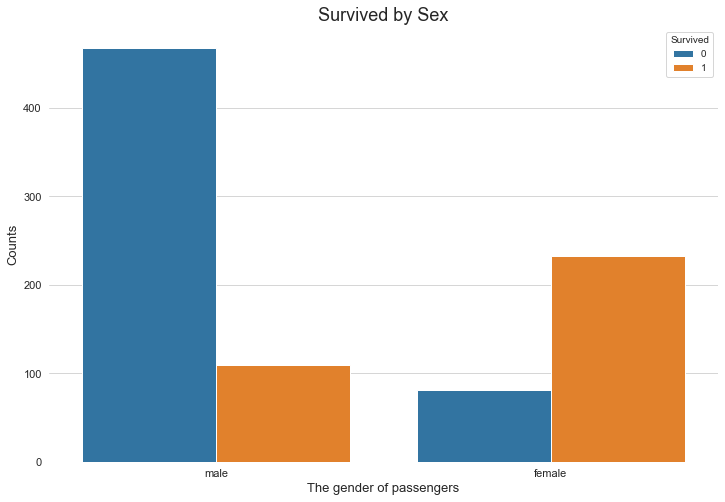

In [11]:
# Make countplot of survivals based on sex
sns.countplot(x = "Sex", hue = "Survived", data = data)
plt.xlabel('The gender of passengers')
plt.ylabel('Counts')
plt.title("Survived by Sex", fontsize = 18)
sns.despine(left=True, bottom=True);

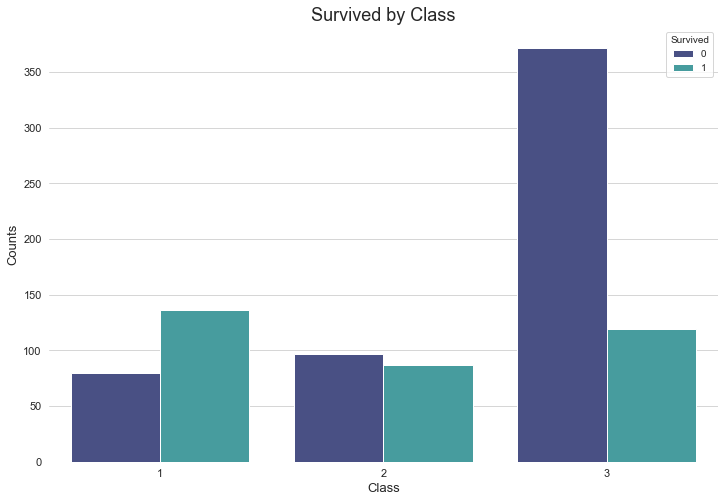

In [18]:
# TASK 1 >>>> Make countplot of survivals based on their Class ('Pclass' column)
sns.countplot(x = "Pclass", hue = "Survived", data = data, palette = 'mako')
plt.xlabel('Class')
plt.ylabel('Counts')
plt.title("Survived by Class", fontsize = 18)
sns.despine(left=True, bottom=True);

# 4. Categorical variables

A categorical variable takes on a limited, and usually fixed, number of possible values (categories).

In [13]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

'Pclass' column is one of the categorical variable in our dataset, although it has 'int' datatype.

When we want to convert the datatype of variable we can easily convert it to categorical variable using `.astype('category')` or we can use an instance of `CategoricalDtype`. Here we have more control and can set the order of categories [1,2,3], pass it within `CategoricalDtype` and then we assign it to 'Pclass' column. 

In [14]:
# Set the categories, set parameter ordered = True, assign in to 'Pclass' column using astype()
cat = [1,2,3]
cat_type = CategoricalDtype(categories = cat, ordered = True)
data['Pclass'] = data['Pclass'].astype(cat_type)

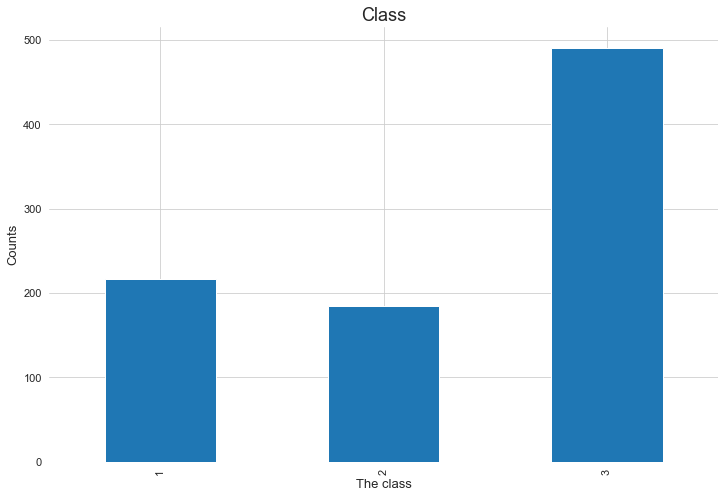

In [15]:
# Plot counts of the categories of 'Pclass' column using .plot(kind = 'bar')
data['Pclass'].value_counts(sort = False).plot(kind = 'bar')
plt.xlabel('The class')
plt.ylabel('Counts')
plt.title('Class', fontsize = 18)
sns.despine(left=True, bottom=True);

In [16]:
# Get the categories of 'Embarked' column
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

There are three ports of embarkation in our dataset: C = Cherbourg, Q = Queenstown and S = Southampton. 

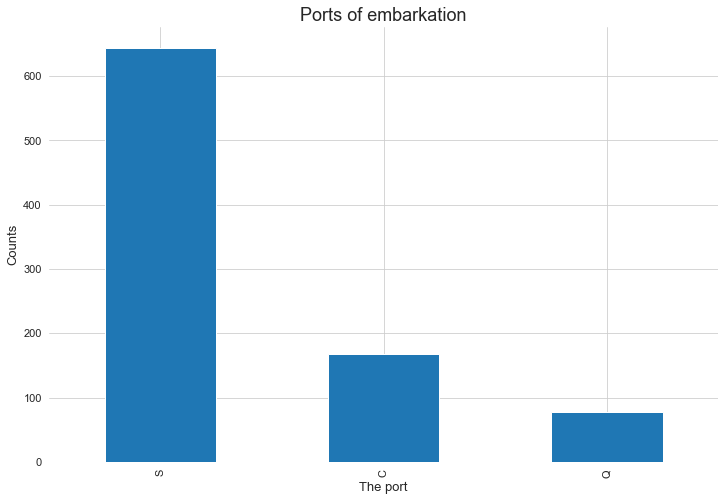

In [17]:
# TASK 2 >>>> Plot counts of the categories of 'Embarked' column using .plot(kind = 'bar')
data['Embarked'].value_counts().plot(kind = 'bar')
plt.xlabel('The port')
plt.ylabel('Counts')
plt.title('Ports of embarkation', fontsize = 18)
sns.despine(left=True, bottom=True);

As we can see the majority of passengers have embarked in Southampton.

# Appendix

Data source: https://www.kaggle.com/hesh97/titanicdataset-traincsv

Data license: CC0: Public Domain